In [14]:
#importing Libraries for data manipulation
import pandas as pd                    #dataframe
import numpy as np                     #numerical python
#importing Libraries for data visualization
import seaborn as sns                  #data visualization
import matplotlib.pyplot as plt        #plotting
import plotly.express as px            #plotting
# Warnings library will be used to ignore some warnings
import warnings                        #warning
warnings.filterwarnings('ignore')

In [15]:
#notebook setting to display all the rowns and columns to have better clearity on the data.
pd.set_option('display.max_rows',None,'display.max_columns',None)

### Basic information about the data

In [16]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('loan.csv')
loan_dd = pd.read_excel('Data_Dictionary.xlsx')

In [17]:
#FIRST DATASET APPLICATION DATA
#UNDERSTANDING DATA SET

In [18]:
#checking rows and columns
print ("loan:",loan_data.shape)

loan: (39717, 111)


In [19]:
#checking rows and columns
print ("Data_Dictionary:",loan_dd.shape)

Data_Dictionary: (117, 2)


In [20]:
#checking loan_data info of columns
loan_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [21]:
#checking Data_Dictionary info of columns
loan_dd.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [22]:
# Data types of each column
print(loan_data.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [23]:
# Describing the dataframe
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [24]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [25]:
print(loan_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status i

### Cleaning the large null value columns and rows

In [26]:
## Checking for missing values
print(loan_data.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [27]:

def nullval(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [28]:
## Checking for missing values %
nullval(loan_data)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

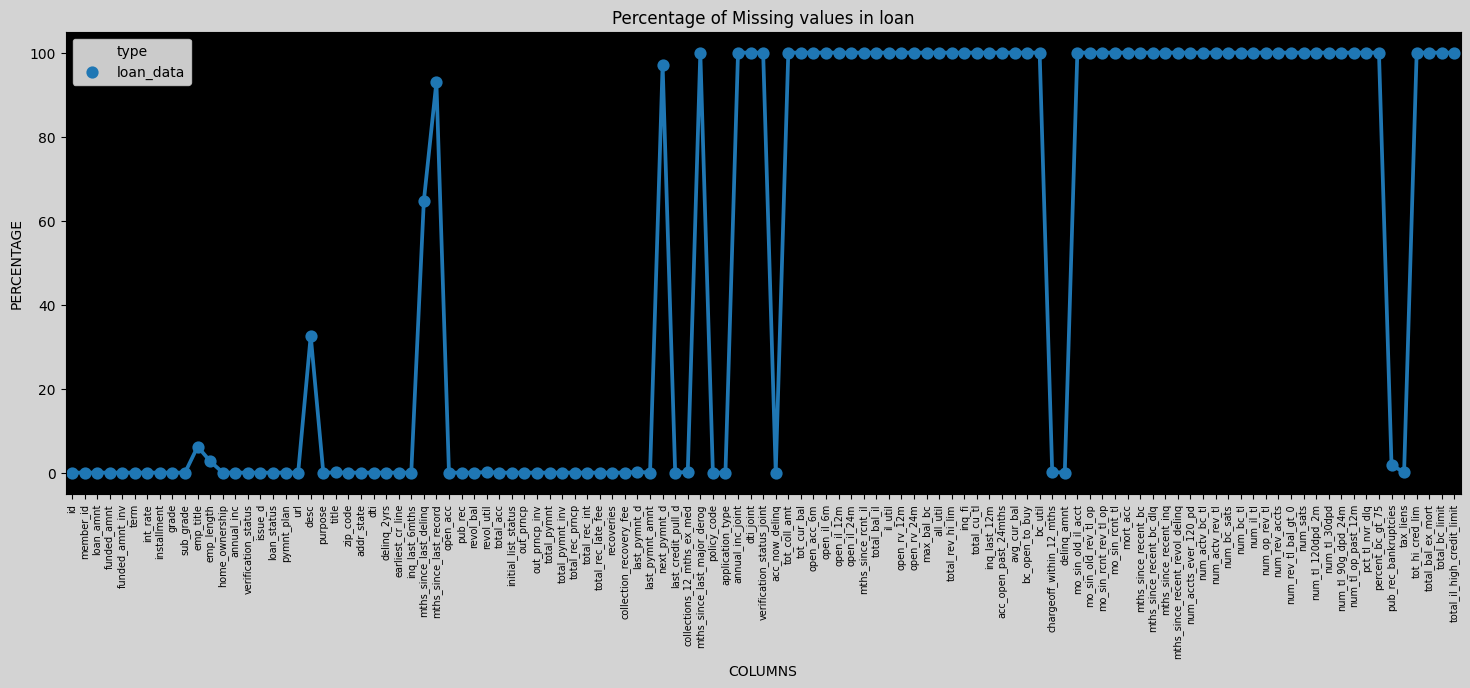

In [29]:
## missing values % graph
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
miss_data["type"] = "loan_data"
ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in loan")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [30]:
#creating a variable null_col_40 for storing null columns having missing values more than 40%
null_col_40 = nullval(loan_data)[nullval(loan_data)>40]
print("following columns have null value more than 40%")
print(null_col_40.index)
print("No. of columns with more than 40% missing value:",len(null_col_40.index))

following columns have null value more than 40%
Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_si

In [31]:
# Removing column with null_col_40 as it will reduce the impact on analysis
loan_data.drop(columns = null_col_40.index, inplace = True)

# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 54)


In [32]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [33]:
print(nullval(loan_data)[nullval(loan_data)>0])

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64


We have removed the column which contain more than 40% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [34]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [35]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


At max % for 6.19% missing value and As the max number of missing value in row is very low compared to the count of columns 54.
We can move ahead with process as the impact is insignificant.

### Removing the irrelevant columns that is not needed.

In [36]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
# Removing member_id as it is a duplicate index column and is not required for the analysis
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
irrelevant_list_columns = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc',
                           'pub_rec','revol_bal','revol_util','total_acc','out_prncp',
                           'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                           'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                           'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type',
                           'title','emp_title','desc','url','zip_code', 'member_id','funded_amnt_inv']
loan_data=loan_data.drop(irrelevant_list_columns,axis=1)


# Shape of the dataframe after removing columns above.
print(loan_data.shape)


(39717, 26)


In [37]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [38]:
# As there are many columns with 1 unique value and null values, we have removed them as they are not relevant to the analysis
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 18)


In [39]:
print(loan_data.nunique().sort_values(ascending=True))

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
installment             15383
id                      39717
dtype: int64


In [40]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


### Removing and fixing the null values

As we have done removing the irrelevant columns, we can move ahead with the analysis and check for null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [41]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


| **Column name** | **Count of Null values** |
|---|---|
|  emp_length | 1075  |
|  pub_rec_bankruptcies | 697  |

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [42]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)



10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
(38642, 18)


In [43]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())


#As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [44]:
# Again checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

id                      0
loan_amnt               0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


We are done with fixing and removing null values to improve the accuracy of the analysis.

In [45]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 18)


### Now, Removing duplicate rows from the dataframe that is no needed.

In [46]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

# No duplicate rows found in the dataframe before and after same.

(38642, 18)


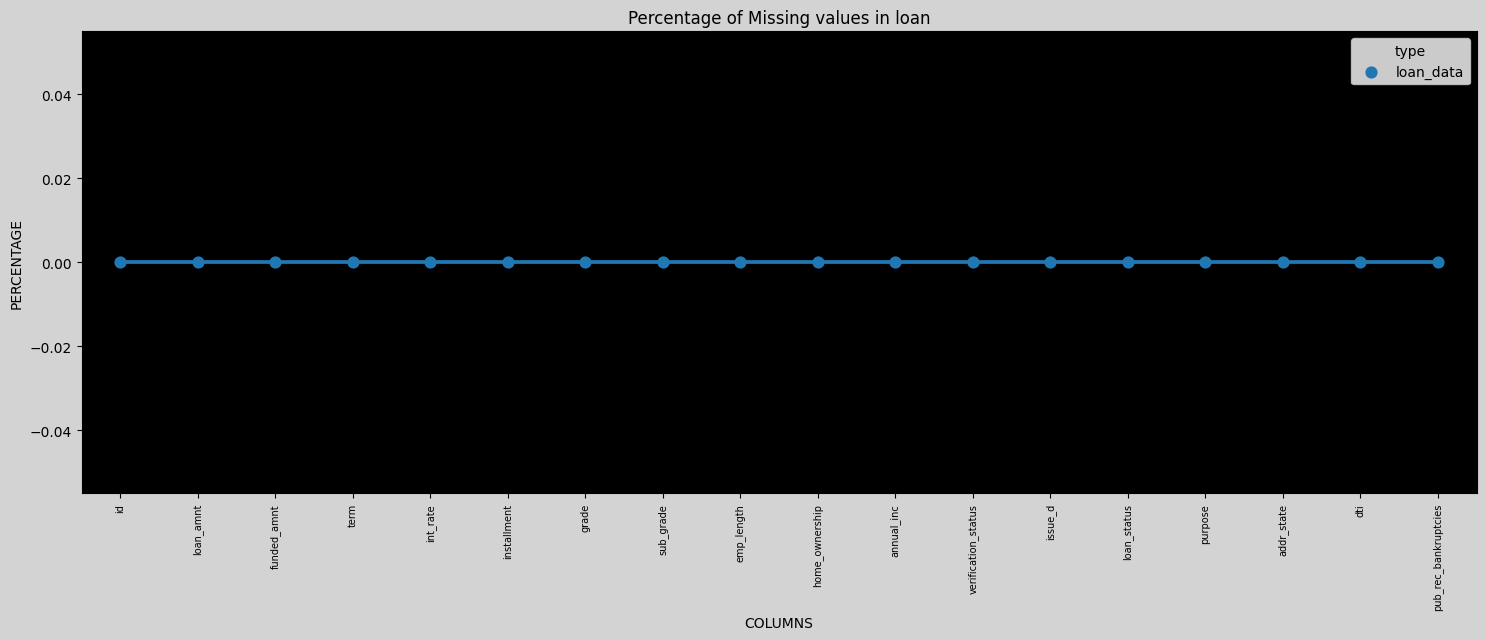

In [47]:
## Missing values % graph
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
miss_data["type"] = "loan_data"
ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in loan")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

### Fixing/Correcting Data Types and Deriving New Columns

In [48]:
# Checking information about the dataframe for type
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [49]:
# Print information about the dataframe
print(loan_data.head(10))

        id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
4  1075358       3000         3000   60 months   12.69%        67.79     B   
5  1075269       5000         5000   36 months    7.90%       156.46     A   
6  1069639       7000         7000   60 months   15.96%       170.08     C   
7  1072053       3000         3000   36 months   18.64%       109.43     E   
8  1071795       5600         5600   60 months   21.28%       152.39     F   
9  1071570       5375         5375   60 months   12.69%       121.45     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0           

Fixing/Correcting data type and format for columns in the dataframe


In [50]:
## term. Object to int and remove the months
loan_data.term=loan_data.term.apply(lambda x: int(str(x).replace(' months',''))).astype(int)
## int_rate  Object to float
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

## Derving more columns with the conversion of data type
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: str(x).replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [51]:
# Setting decimal point limit for all data
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)

# Print information about the dataframe
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


As we can only perform analysis on the Accepted loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [52]:
# Checking information about the dataframe for type
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int64         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status     

In [53]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status != 'Current']

# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


As We have done the data cleaned up, fixed and filtered as per requirement.
We can select columns required for analysis and move ahead with the analysis.

In [54]:
# selecting columns based on domain knowledge # Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade,
# Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower,
# DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[
    ['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
     'annual_inc', 'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 17)


In [55]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

<Axes: >

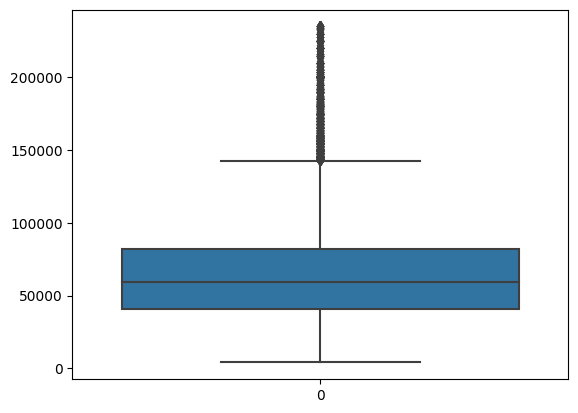

In [94]:
sns.boxplot(loan_data['annual_inc'])

In [56]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

In [57]:
## starting with loan_amnt
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data, x='loan_amnt', width=750, height=350, title='Distribution of Loan Amount',
       labels={'loan_amnt': 'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [58]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data, x='int_rate', width=750, height=350, title='Distribution of Interest Rate',
       labels={'int_rate': 'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [59]:
## starting with annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data, x='annual_inc', width=750, height=350, title='Distribution of Annual Income of the Burrower',
       labels={'annual_inc': 'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.


In [60]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc), width=750, height=350, title='Trend of Annual Income',
        labels={'value': 'Annual Income', 'index': 'Position in Data'}).show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [61]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc <= np.percentile(loan_data.annual_inc, 99)]

In [62]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc), width=750, height=350, title='Trend of Annual Income',
        labels={'value': 'Annual Income', 'index': 'Position in Data'}).show()

As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

In [63]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data, x='dti', width=750, height=350, title='Distribution of Debt To Income Ratio',
       labels={'dti': 'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

**The data has been cleaned and outliers removed, we can move ahead with the analysis.**

**The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.**

### Univariate Analysis

In [103]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

Fully Paid     85.580932
Charged Off    14.419068
Name: loan_status, dtype: float64


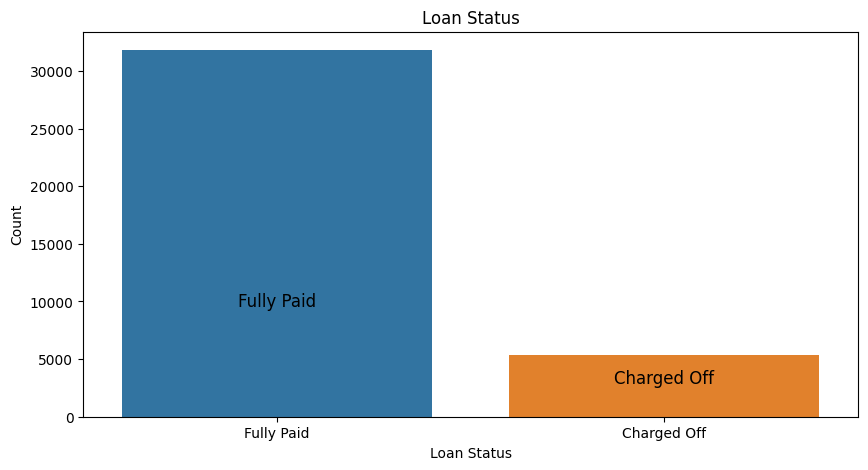

In [64]:
# Loan status
print(loan_data.loan_status.value_counts() * 100 / loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='loan_status', data=loan_data)
ax.annotate('Fully Paid', xy=(0.25, 0.3), xycoords='axes fraction', horizontalalignment='center',
            verticalalignment='center', fontsize=12)
ax.annotate('Charged Off', xy=(0.75, 0.1), xycoords='axes fraction', horizontalalignment='center',
            verticalalignment='center', fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()


**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

In [65]:
# Loan Amount
print(loan_data.loan_amnt.describe())
# Plotting histogram of loan amount
px.box(loan_data, x='loan_amnt', width=750, height=350, title='Distribution of Loan Amount',
       labels={'loan_amnt': 'Loan Amount'}).show()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


**Inference**: The loan amount varies from 500 to 35000 with a mean of 9800.

36    75.37729
60    24.62271
Name: term, dtype: float64


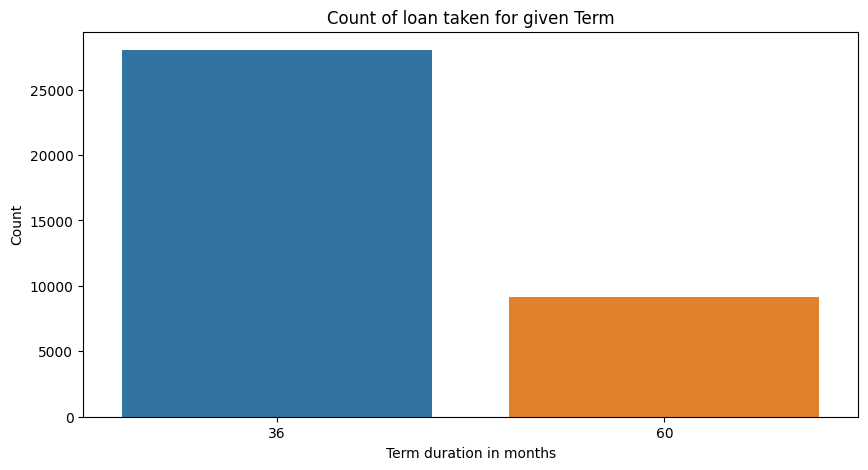

In [66]:
# Term of loan
print(loan_data.term.value_counts() * 100 / loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='term', data=loan_data)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

**Inference**: More than half of the loan taken has term of 36 months compared to 60 months.

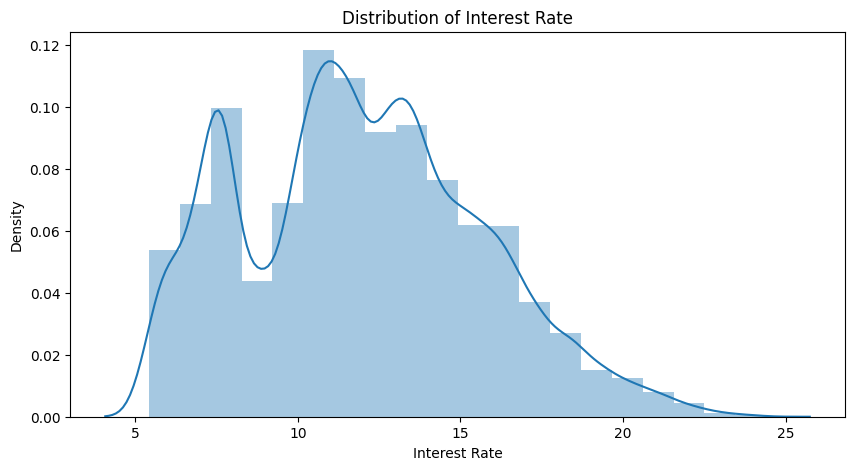

In [67]:
# Distribution of interest rate
plt.figure(figsize=(10, 5))
sns.distplot(sorted(loan_data.int_rate), kde=True, bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

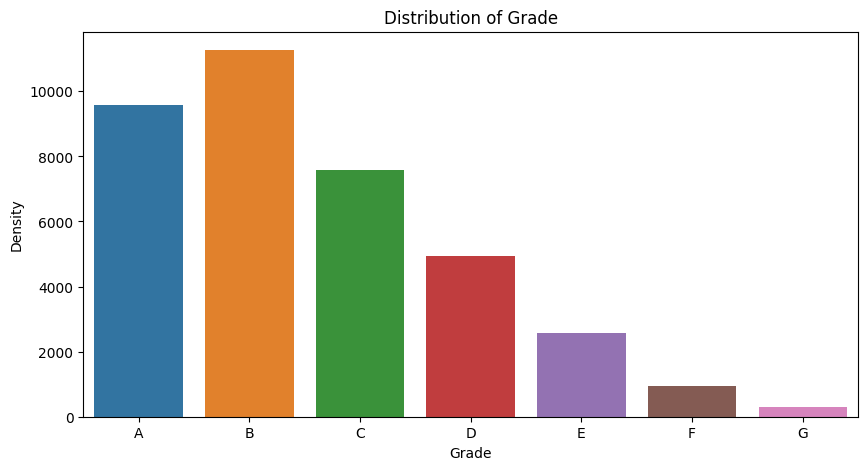

In [68]:
# Distribution of Greade
plt.figure(figsize=(10, 5))
sns.countplot(x='grade', data=loan_data)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Inference**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

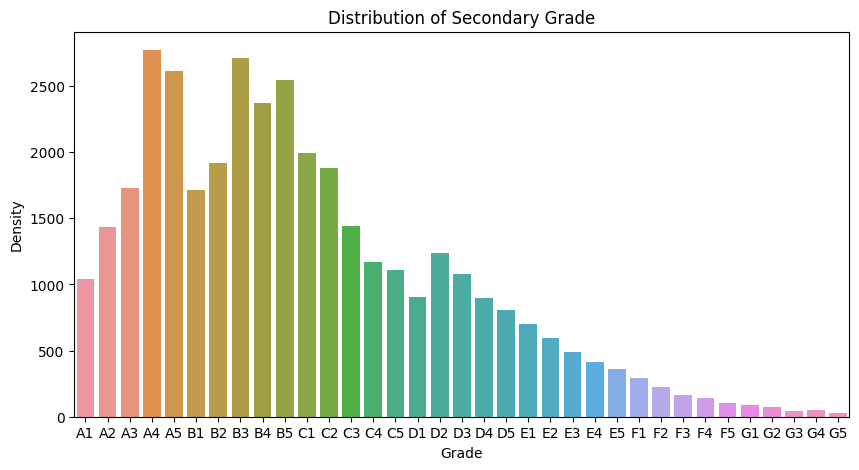

In [69]:
# Distribution of Greade
plt.figure(figsize=(10, 5))
sns.countplot(x='sub_grade', data=loan_data)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

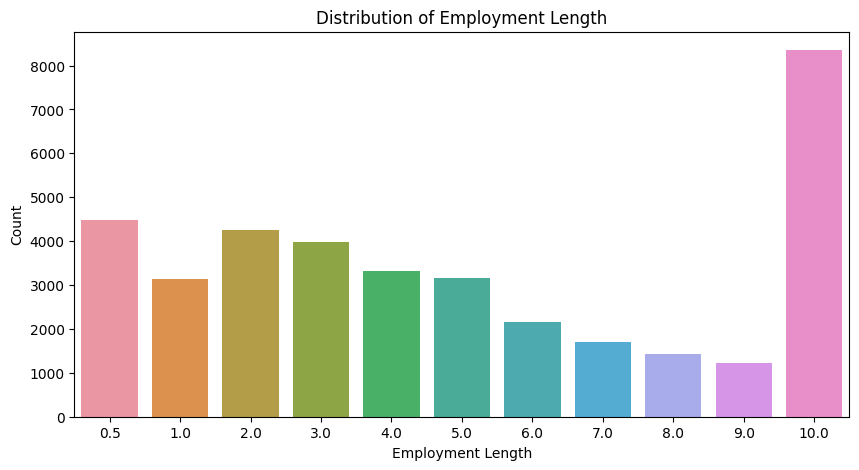

In [70]:
# Distribution of emp_length
plt.figure(figsize=(10, 5))
sns.countplot(x='emp_length', data=loan_data)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length', fontsize=12)
plt.show()

**Inference**: Majority of borrowsers have working experience greater than 10 years.

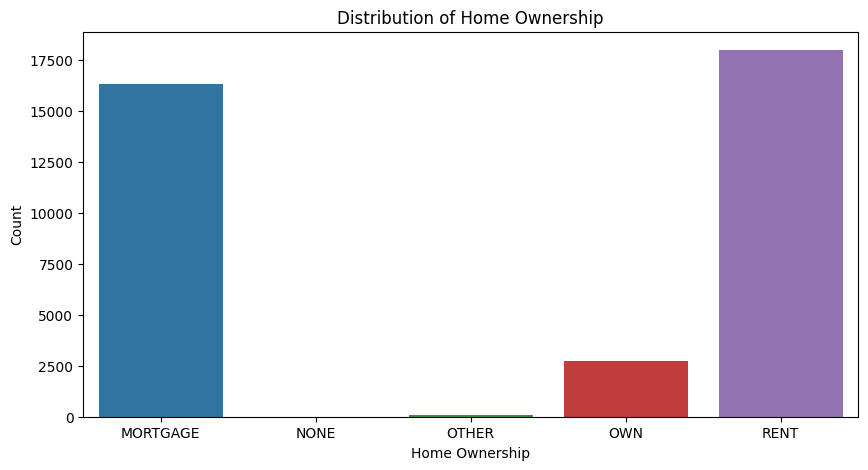

In [71]:
# Distribution of home_ownership
plt.figure(figsize=(10, 5))
sns.countplot(x='home_ownership', data=loan_data)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership', fontsize=12)
plt.show()

**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

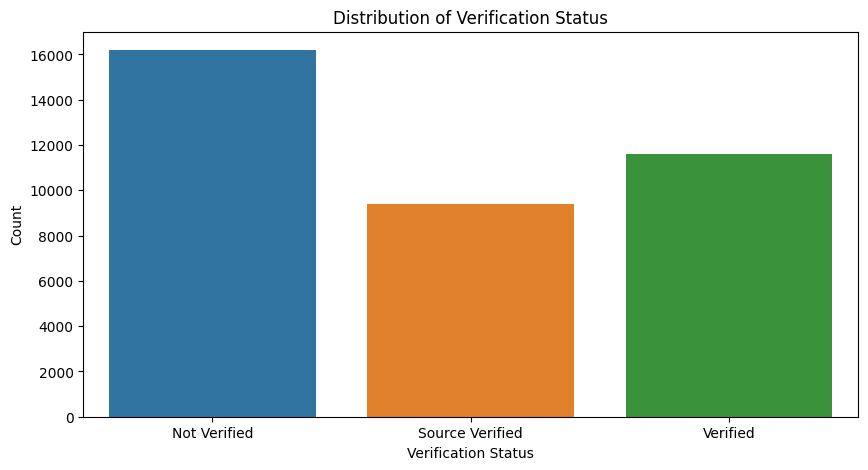

In [72]:
# Distribution of verification_status
plt.figure(figsize=(10, 5))
sns.countplot(x='verification_status', data=loan_data)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status', fontsize=12)
plt.show()

**Inference**: About 50% of the borrowers are verified by the company or have source verified.

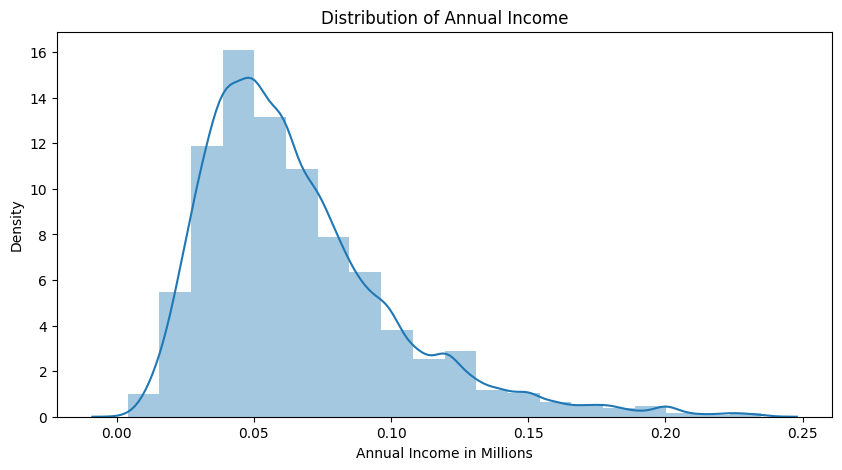

In [73]:
# Distribution of annual_inc
plt.figure(figsize=(10, 5))
sns.distplot(loan_data.annual_inc/1000000, kde=True, bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income', fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

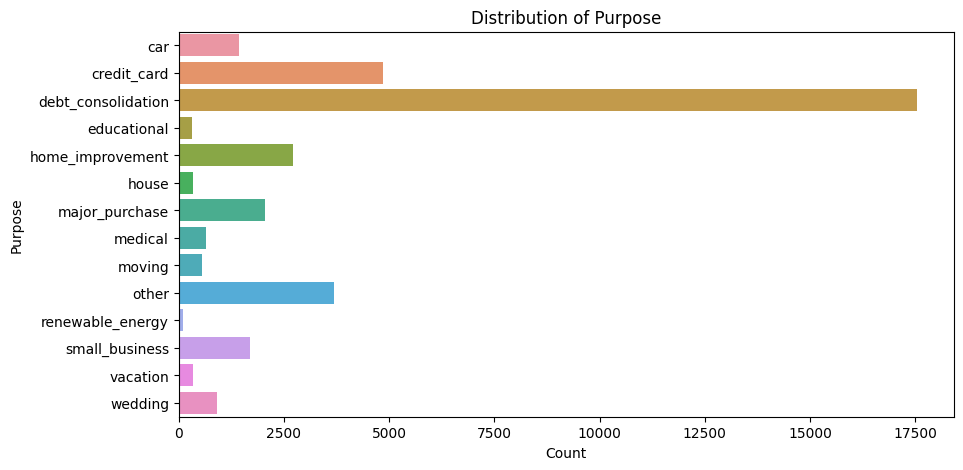

In [74]:
# Distribution of purpose
plt.figure(figsize=(10, 5))
sns.countplot(y='purpose', data=loan_data)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose', fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

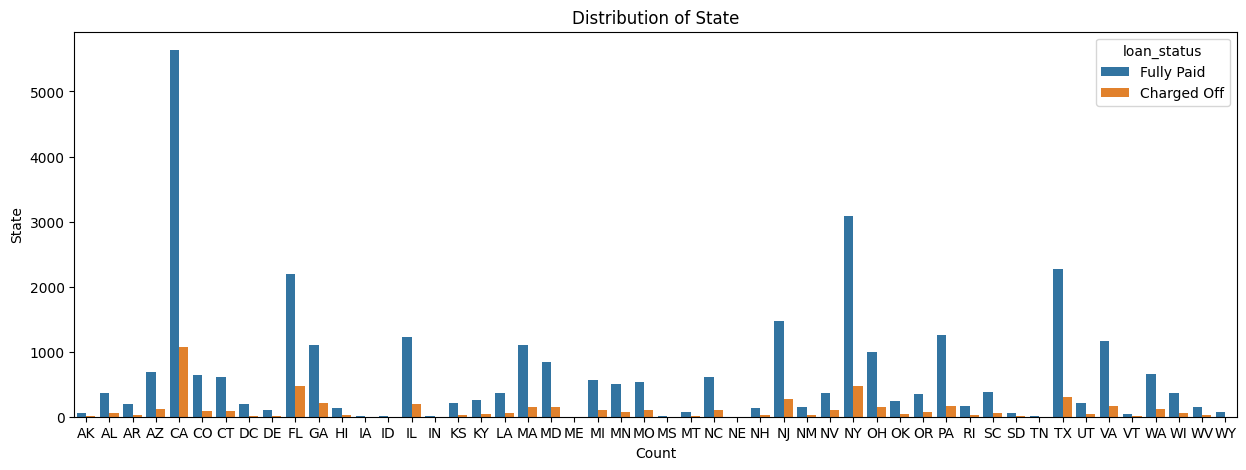

In [75]:
# Distribution of addr_state
plt.figure(figsize=(15, 5))
sns.countplot(x='addr_state', data=loan_data, hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State', fontsize=12)
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

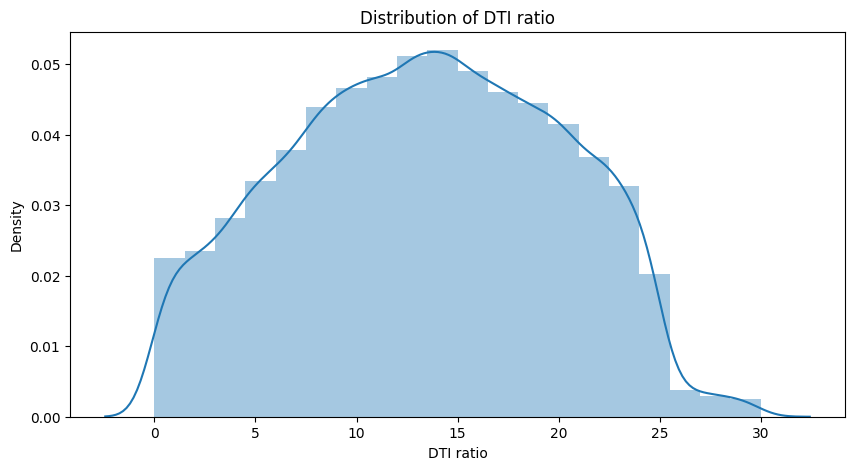

In [76]:
# Distribution of dti
plt.figure(figsize=(10, 5))
sns.distplot(loan_data.dti, kde=True, bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio', fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

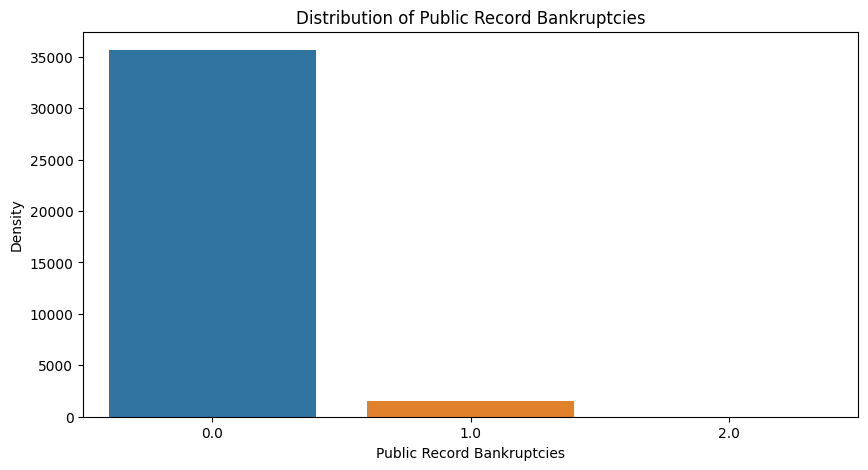

In [77]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10, 5))
sns.countplot(x='pub_rec_bankruptcies', data=loan_data)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies', fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

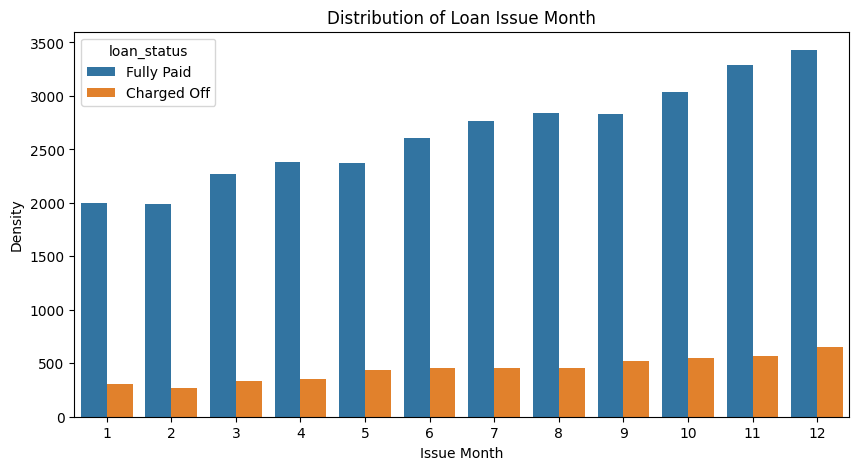

In [78]:
# Distribution of issue_month
plt.figure(figsize=(10, 5))
sns.countplot(x='issue_month', data=loan_data, hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month', fontsize=12)
plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

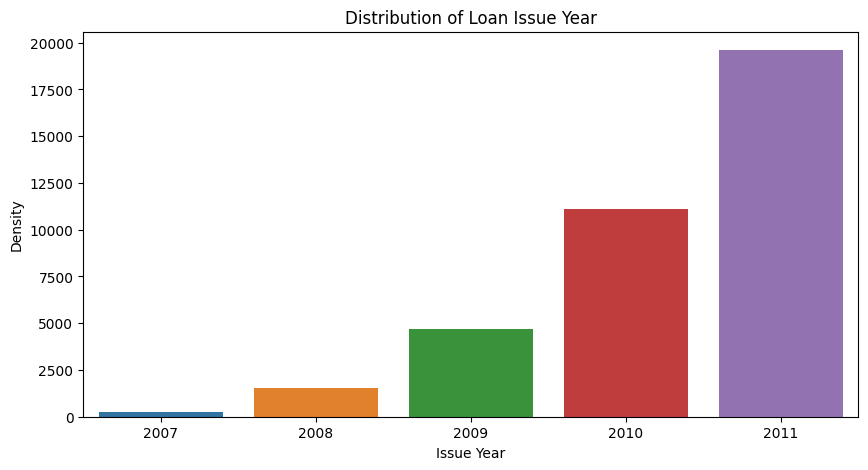

In [79]:
# Distribution of issue_year
plt.figure(figsize=(10, 5))
sns.countplot(x='issue_year', data=loan_data)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year', fontsize=12)
plt.show()

**Inference**: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

In [107]:

loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])



Compare

<Axes: xlabel='issue_year', ylabel='count'>

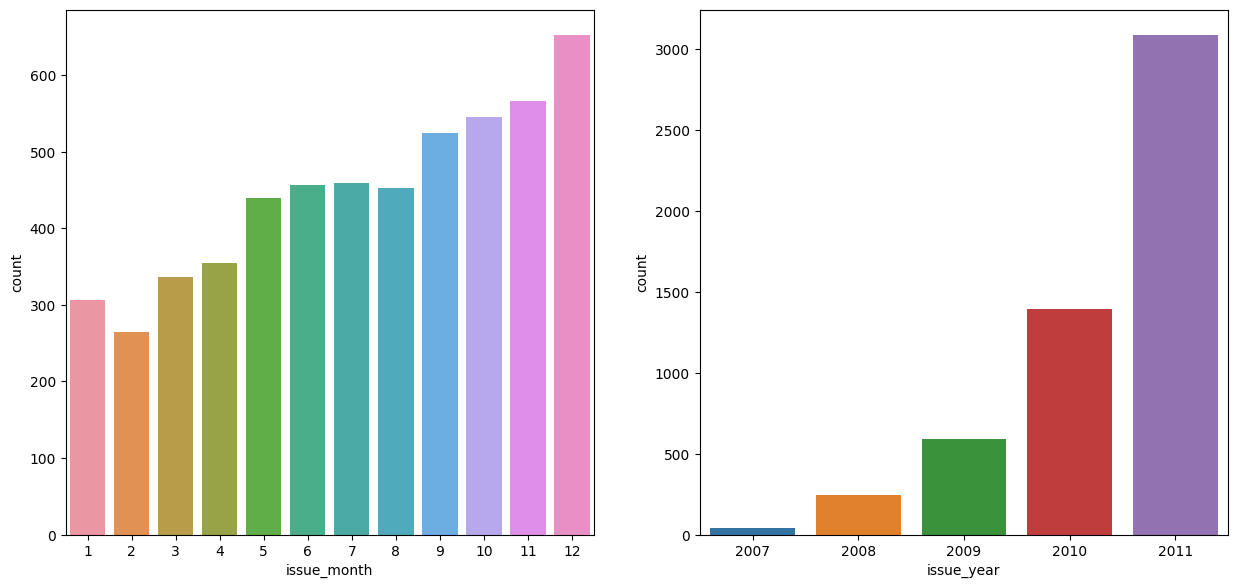

In [104]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

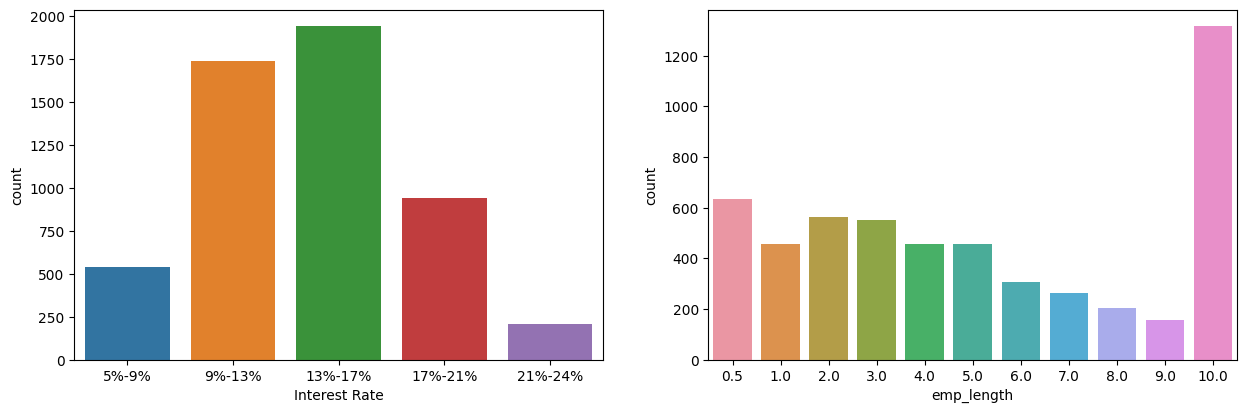

In [99]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

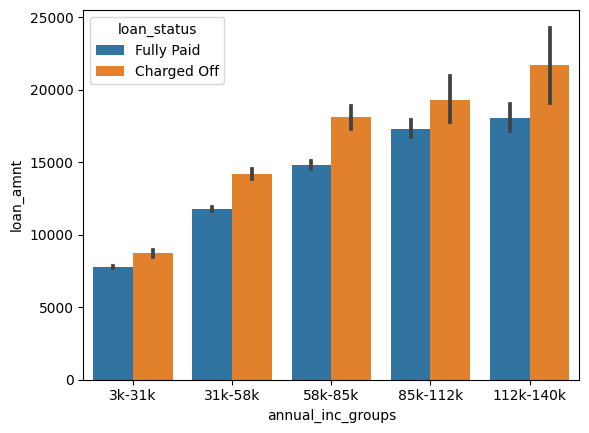

In [108]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

Annual income vs int_rate

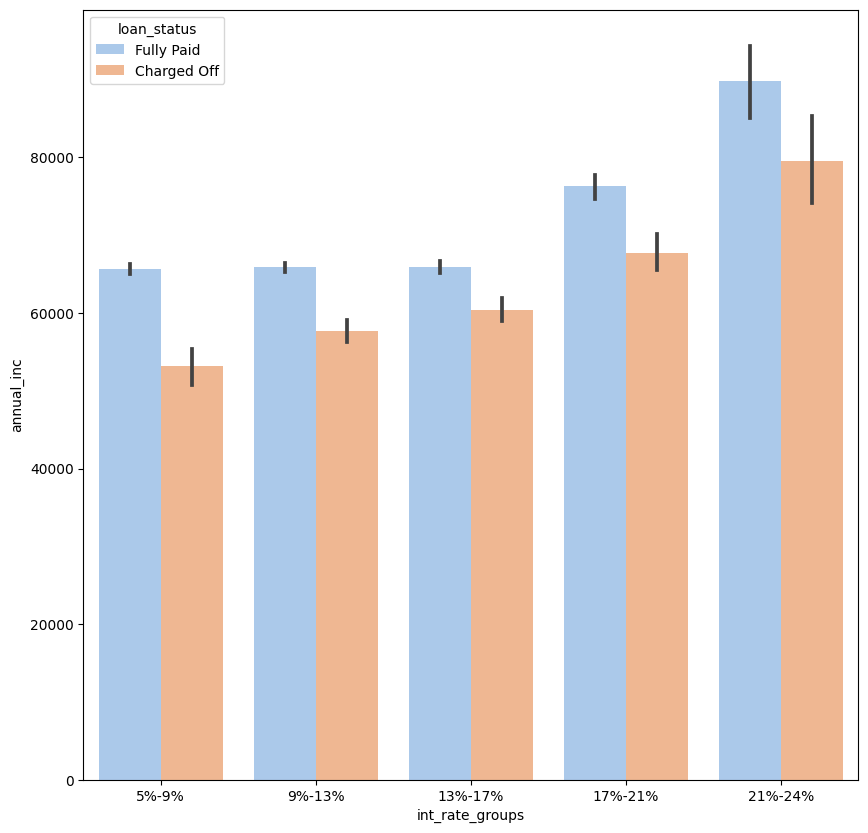

In [109]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

Loan Amount vs Interest Rate

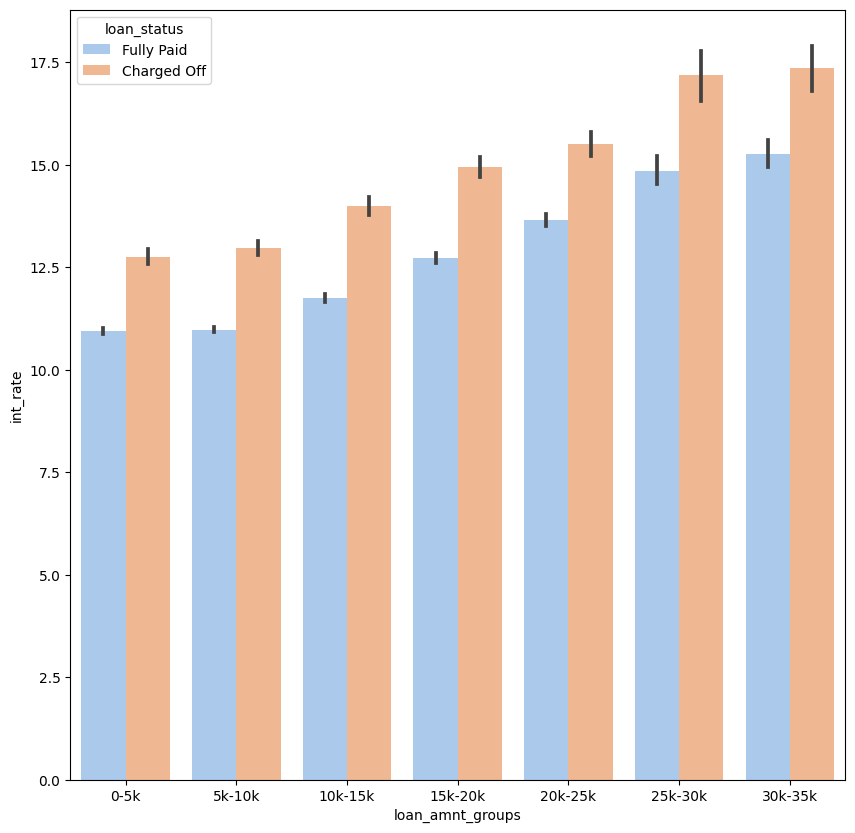

In [110]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

Loan vs Loan purpose

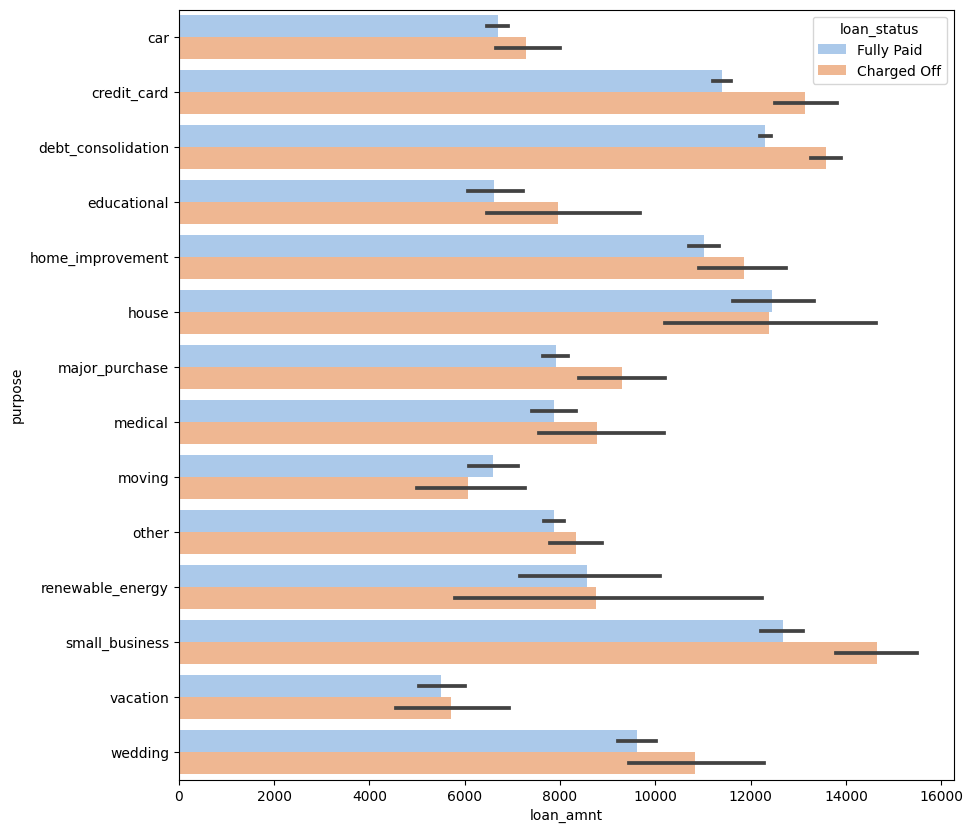

In [111]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

Loan amount vs month issued and year issued


<Axes: xlabel='issue_year', ylabel='loan_amnt'>

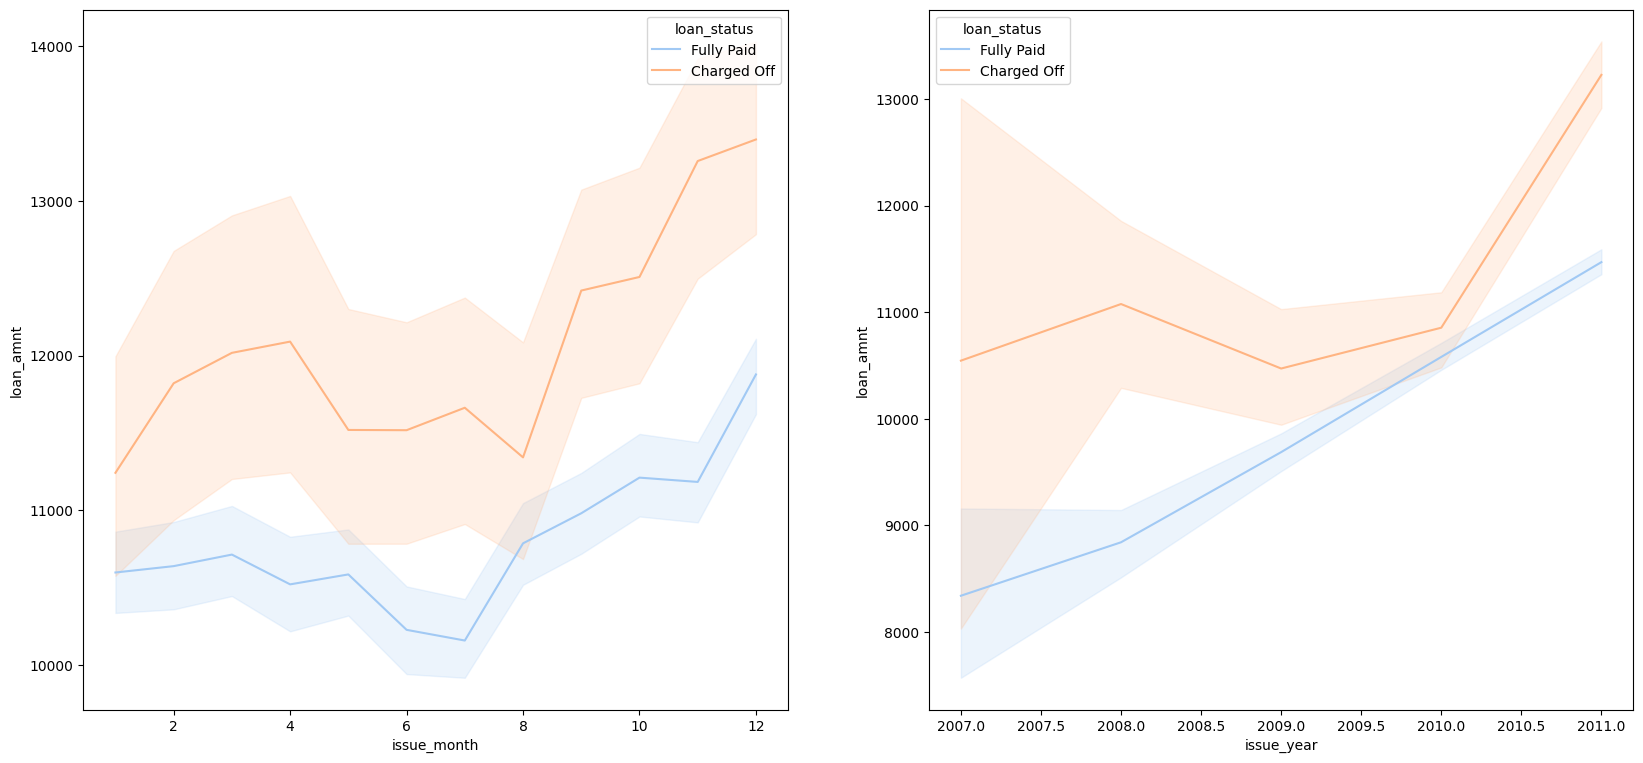

In [112]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


### Segmented Univariate Analysis

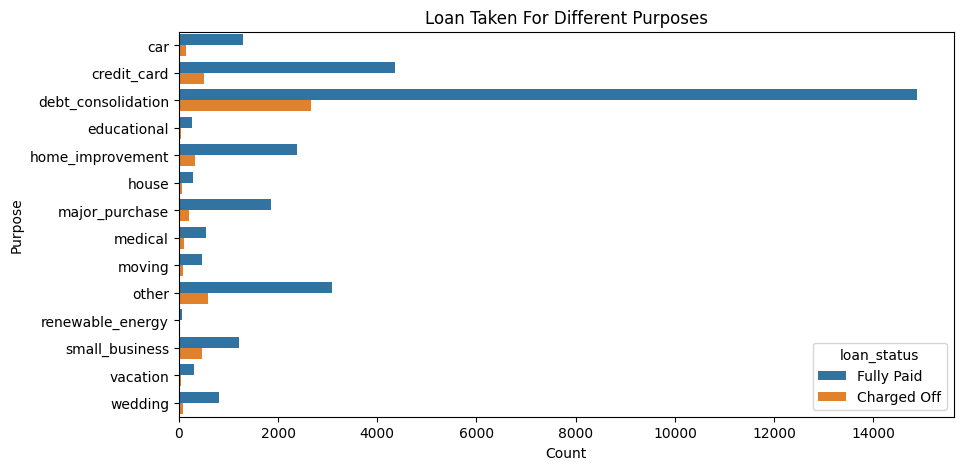

In [80]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, y='purpose', hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes', fontsize=12)
plt.show()

**Inference:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

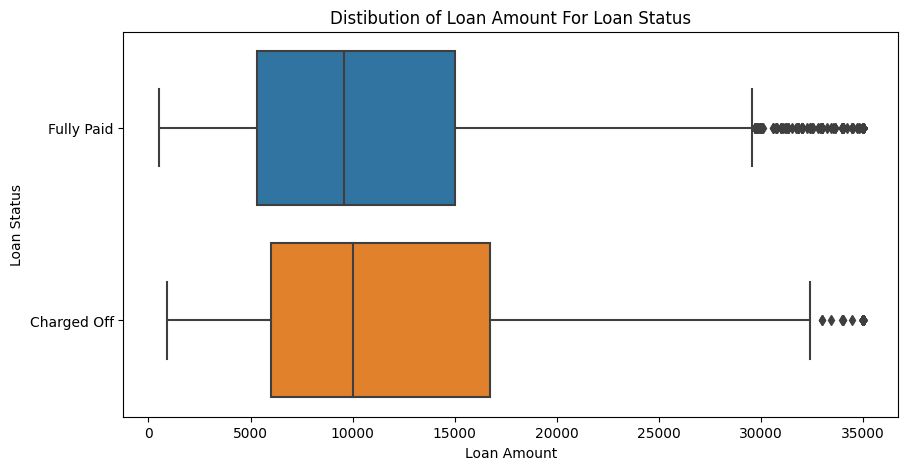

In [81]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10, 5))
sns.boxplot(data=loan_data, x='loan_amnt', y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status', fontsize=12)
plt.show()

**Inference:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

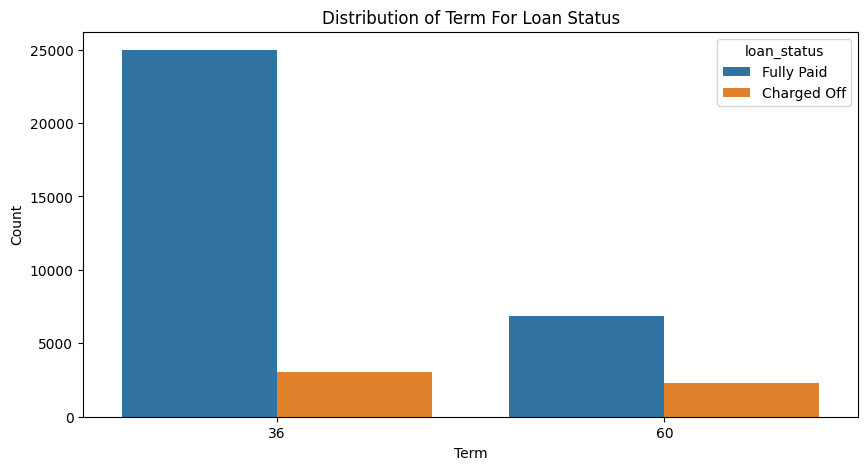

In [82]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='term', hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status', fontsize=12)
plt.show()

**Inference:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

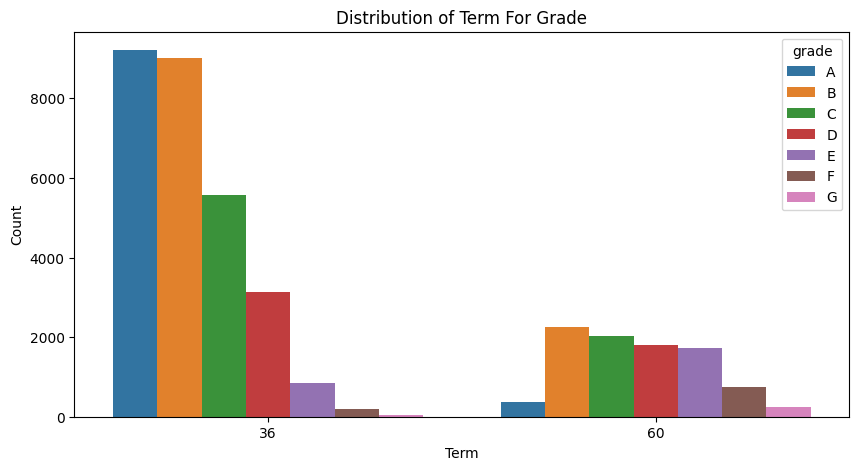

In [83]:
# Distribution of Term based on Grade
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='term', hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade', fontsize=12)
plt.show()

**Inference:** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

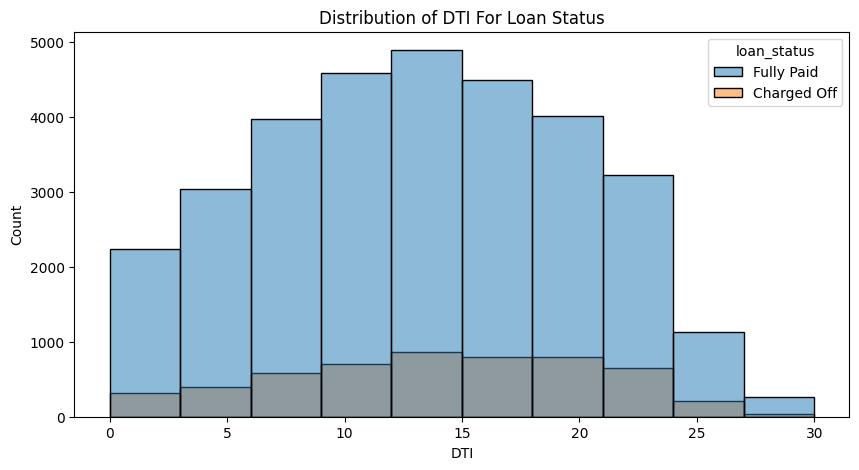

In [84]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10, 5))
sns.histplot(data=loan_data, x='dti', hue='loan_status', bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status', fontsize=12)
plt.show()

**Inference:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

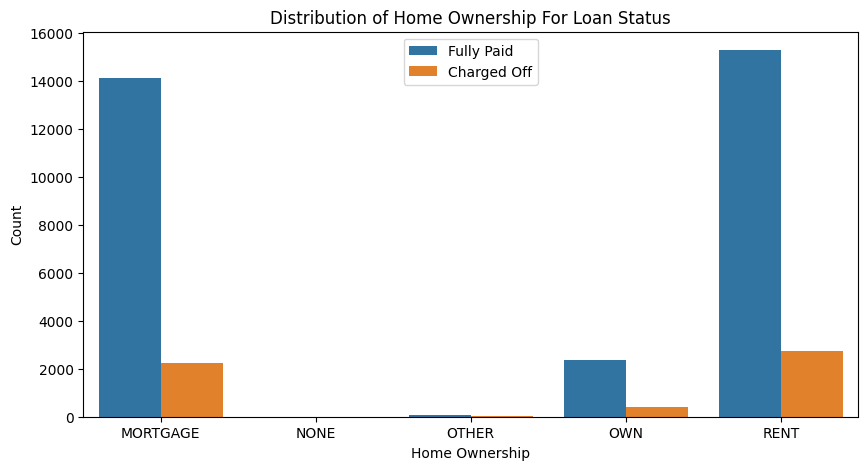

In [85]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status', fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Inference:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

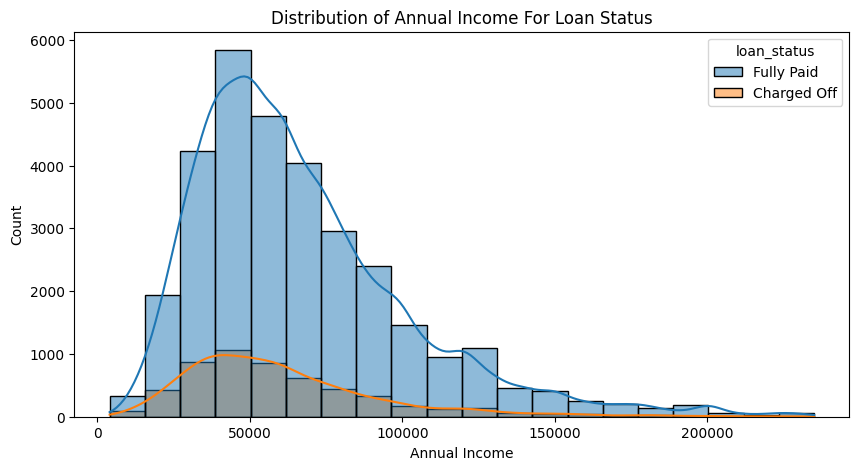

In [86]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10, 5))
sns.histplot(data=loan_data, x='annual_inc', hue='loan_status', bins=20, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status', fontsize=12)
plt.show()

**Inference:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

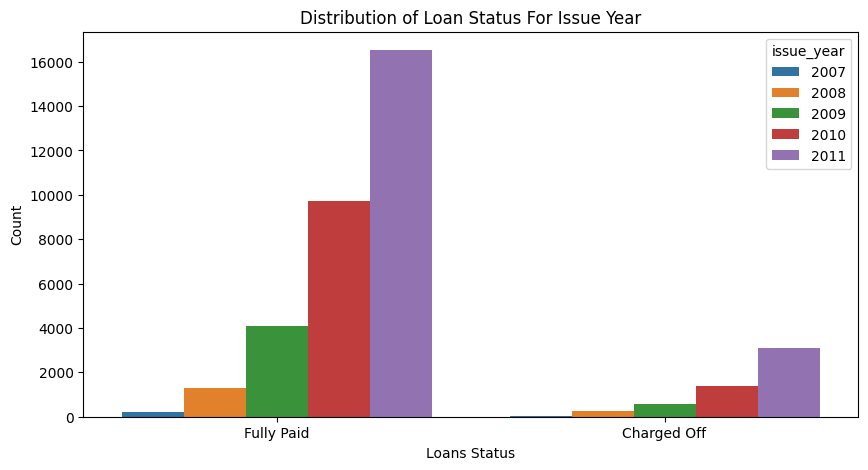

In [87]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='loan_status', hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year', fontsize=12)
plt.show()

**Inference:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

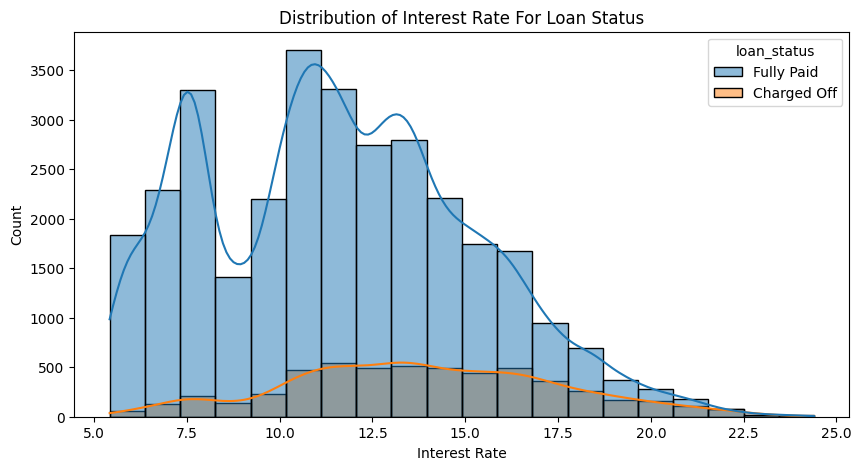

In [88]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10, 5))
sns.histplot(data=loan_data, x='int_rate', hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status', fontsize=12)
plt.show()

**Inference:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

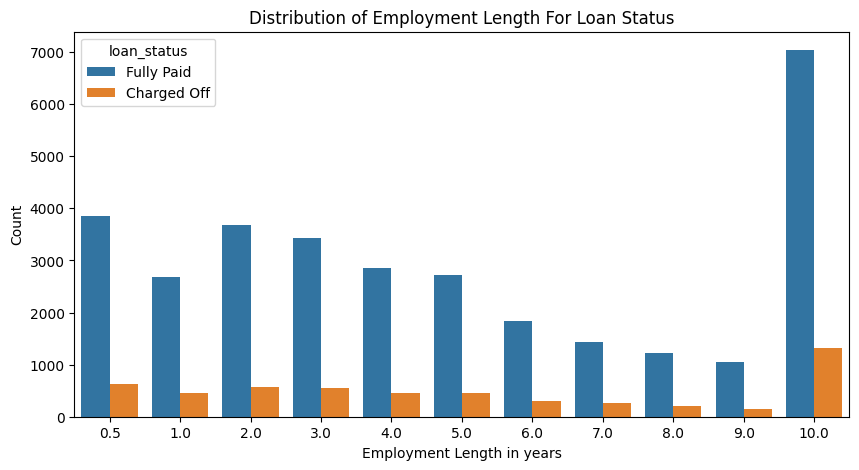

In [89]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='emp_length', hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status', fontsize=12)
plt.show()

**Inference:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

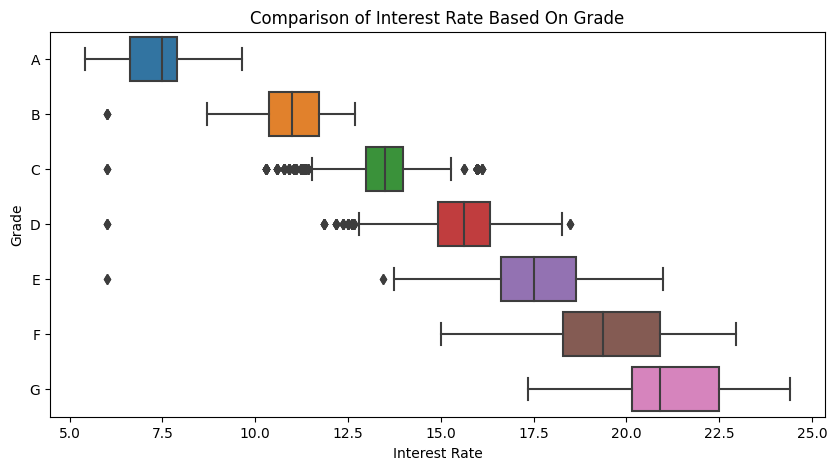

In [90]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10, 5))
sns.boxplot(data=loan_data, x='int_rate', y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade', fontsize=12)
plt.show()

**Inference:** The Grade represent risk factor thus we can say interst rate increases with the risk.

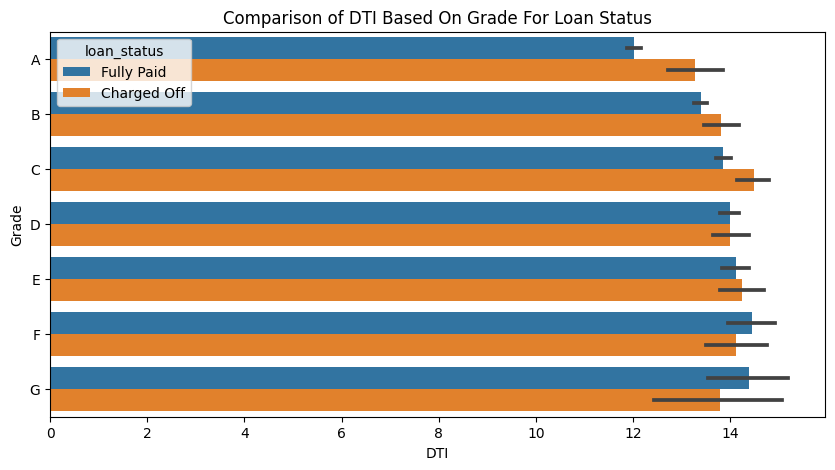

In [91]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10, 5))
sns.barplot(data=loan_data, x='dti', y='grade', hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status', fontsize=12)
plt.show()

**Inference:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

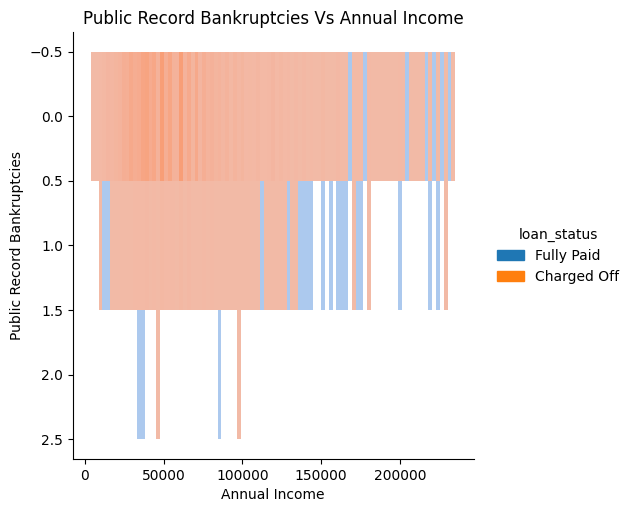

In [92]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10, 5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'), x=loan_data.annual_inc, hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income', fontsize=12)
plt.show()

**Inference:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

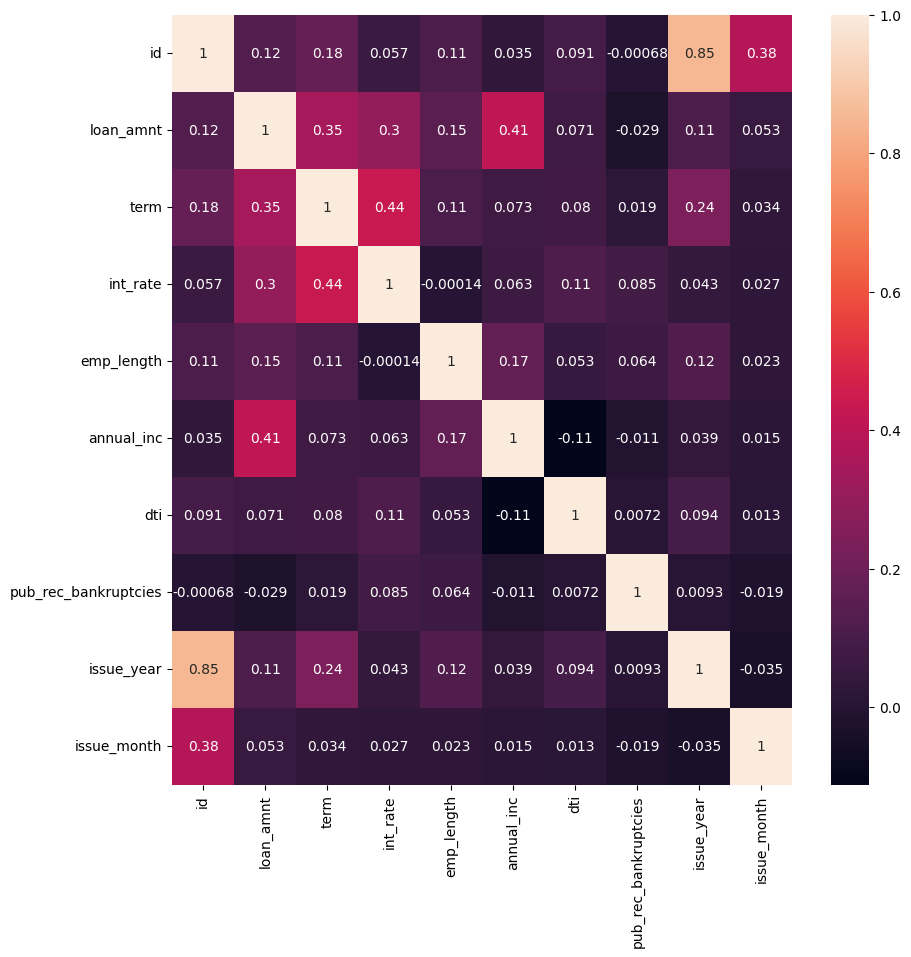

In [93]:
# Heatmap of correlation between variables
plt.figure(figsize=(10, 10))
sns.heatmap(loan_data.corr(), annot=True)
plt.show()

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
  1. DTI
  2. Grades
  3. Verification Status
  4. Annual income
  5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
  1. Burrowers from large urban cities like california, new york, texas, florida etc.
  2. Burrowers having annual income in the range 50000-100000.
  3. Burrowers having Public Recorded Bankruptcy.
  4. Burrowers with least grades like E,F,G which indicates high risk.
  5. Burrowers with very high Debt to Income value.
  6. Burrowers with working experience 10+ years.
  7. Applicants having house_ownership as 'RENT'
  8. Applicants who use the loan to clear other debts
  9. Applicants who receive interest at the rate of 13-17%
  10. Applicants who have an income of range 31201 - 58402
  11. Applicants who have 20-37 open_acc
  12. Applicants with employement length of 10
  13. When funded amount by investor is between 5000-10000
  14. Loan amount is between 5429 - 10357
  15. Dti is between 12-18
  16. When monthly installments are between 145-274
  17. Term of 36 months
  18. When the loan status is Not verified
  19. When the no of enquiries in last 6 months is 0
  20. When the number of derogatory public records is 0
  21. When the purpose is 'debt_consolidation'
  22. Grade is 'B'
  23. And a total grade of 'B5' level.